### Three business questions:
1.What (features) affect the rating score?  
2.What are the common key words of high-rating airbnb and what are those of low-rating airbnb?  
3.What are the commonly used words in the description session of high rating airbnb? Are they different from the low-rating airbnb?

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [3]:
df_listings = pd.read_csv('./datasets/listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [14]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

The whole project cares about what affects the review scores, so the first step is deleting the listings with missing values in 'review_score_rating'.

In [4]:
df_new = df_listings.dropna(subset = ['review_scores_rating'], axis = 0)
y      = df_new.review_scores_rating

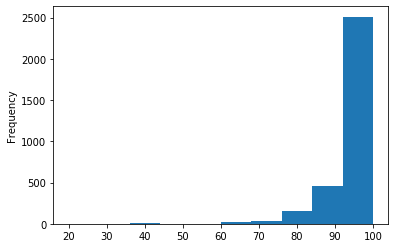

In [5]:
y.plot(kind = 'hist')

In [39]:
# compare those who get 100 score with those who are the last 25% percentile
df_high_score = df_new[y > np.percentile(y,75)]
df_low_score  = df_new[y < np.percentile(y,25)]

In [18]:
def count_adj(df, col1, col2, look_for):
    '''
    from udacity Data Scientist Nanodegree
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col1]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [13]:
possible_adj = ['charming', 'private', 'elegant', 'cozy', 'comfortable', 
                'clean', 'wonderful', 'beautiful', 'modern', 'great',
                'functional', 'fresh', 'close', 'historic', 'quiet',
                'gorgeous', 'safe', 'convenient', 'lovely', 'vintage',
                'amazing', 'walkable', 'adorable', 'bright', 'light',
                'new', 'spacious', 'large']

In [49]:
# plot out the adjective usage difference between two groups
def adj_usage_plot(df, title = 'Adjectives used in desciption', txt = 'description', plot = True, color = 'blue'):
    '''
    modified from udacity Data Scientist Nanodegree
    '''
    adj = df[txt].value_counts().reset_index()
    adj.rename(columns={'index': 'adjectives', txt: 'count'}, inplace=True)
    adj_df = count_adj(adj, 'adjectives', 'count', possible_adj)
    
    adj_df.set_index('adjectives', inplace = True)
    
    if plot:
        (adj_df/adj_df.sum()).plot(kind = 'bar', legend = None, color = color);
        plt.title(title);
        plt.show()
        
    props_adj_df = adj_df/adj_df.sum()
    
    return props_adj_df

### First, let's see whether and how subjective factor -- description -- affects review scores

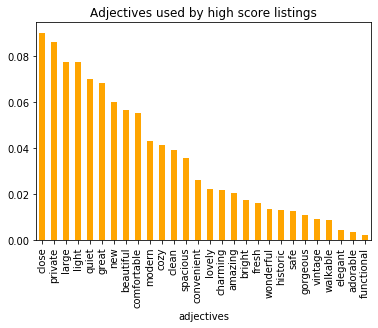

In [47]:
props_high_adj = adj_usage_plot(df_high_score, title = 'Adjectives used by high score listings', plot = True, color = 'orange')

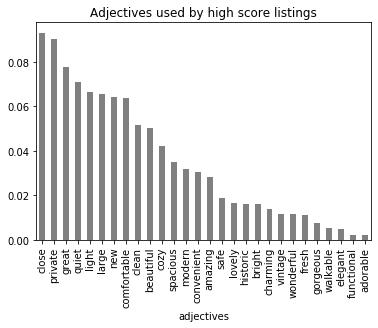

In [45]:
props_low_adj = adj_usage_plot(df_low_score, title = 'Adjectives used by high score listings', plot = True, color = 'grey')

It seems how the host descibes the listing doesn't matter that much. 
### What about the desciption of the neighborhood?


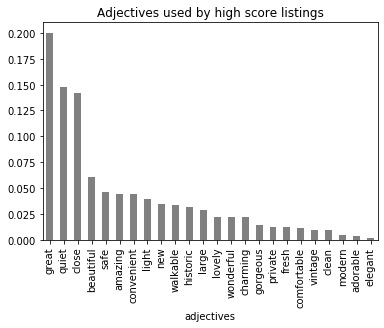

In [50]:
props_neighbor_low = adj_usage_plot(df_low_score, title = 'Adjectives used by high score listings', txt = 'neighborhood_overview', plot = True, color = 'grey')

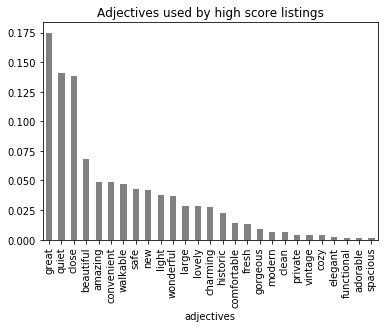

In [51]:
props_neighbor_low = adj_usage_plot(df_high_score, title = 'Adjectives used by high score listings', txt = 'neighborhood_overview', plot = True, color = 'grey')

### It seems subjective factors did not affect the review score rating. The next step is to explore the objective factors.
All the objective factors of interests include: 

**Quantitive variables:**  
1) 'accommodates'  
2) 'bathrooms'  
3) 'bedrooms'  
4) 'amenities': I will use the complexity of the amenities, i.e. how many amenities are listed  
5) 'price': I will use price per person, so it will be divided by accommodates first  
6) 'security_deposite'  
7) 'cleaning_fee'  

**Categorical variables:**  
1) 'host_response_time': within an hour, within a few hours, within a day, a few days or more  
2) 'host_is_superhost': whether the host is a superhost or not, boolean variable  
3) 'host_has_profile_pic': whether the host provides a profile picture or not, boolean variable  
4) 'host_identity_verified': whether the host's identity is verified or not  
5) 'is_location_exact': whether the location provided is accurate or not  
6) 'room_type': entire home/apt, private room, shared room  
7) 'bed_type': real bed, futon, pull_out sofa, airbed, couch  
8) 'cancellation_policy': strict, moderate, flexible  
9) 'instant_bookable': boolean  
10) 'require_guest_profile_picture': boolean  
11) 'require_guest_phone_verification': boolean  

**Special varibales:** whether the row is null or not is the information we care about.  
1) 'transit': whether transportation method is provided  
2) 'host_about': whether the host provides self introduction  

In [93]:
df_new.isnull().sum(axis=0)

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              167
space                                328
description                            0
experiences_offered                    0
neighborhood_overview                738
notes                               1184
transit                              644
thumbnail_url                        257
medium_url                           257
picture_url                            0
xl_picture_url                       257
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host_location                          0
host_about                           577
host_response_time                   312
host_response_rate                   312
host_acceptance_

In [86]:
df_new.require_guest_phone_verification.isnull().sum()

0

In [92]:
df_new.cancellation_policy.value_counts()

strict      1257
moderate    1134
flexible     780
Name: cancellation_policy, dtype: int64